匹配到 1024 个样本
排序结果已保存到 /storage_fast/lwang/SeqRecDistill/RRec/scores/sorted_1024_fold_1.npy
可视化结果已保存到 curriculum_seq_random.png


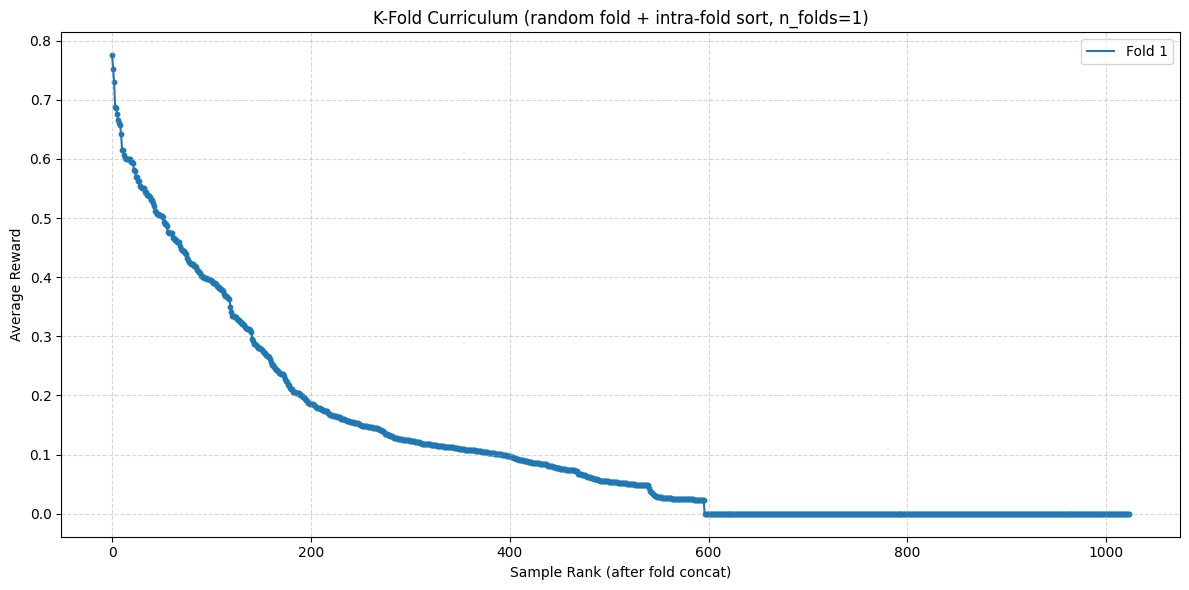

In [10]:
import numpy as np
import json
import matplotlib.pyplot as plt
import random

def random_fold_sort_with_visual(
    n: int,
    jsonl_path: str,
    output_path: str,
    n_folds: int = 5,
    plot_path: str = "reward_difficulty.png",
    seed: int = 42
):
    # 1. 构造路径 & 读取 NPY (保持 int 类型)
    npy_path = f"/storage_fast/lwang/SeqRecDistill/RRec/scores/selected_indices_{n}.npy"
    selected_ids = set(np.load(npy_path).astype(int))

    # 2. 读取 jsonl & 求均值 (保持 int 类型的 sample_id)
    sample_rewards = {}
    with open(jsonl_path, 'r') as f:
        for line in f:
            data = json.loads(line)
            sid = int(data["sample_id"])
            if sid in selected_ids:
                avg_reward = np.mean(data["reward"])
                sample_rewards[sid] = avg_reward

    print(f"匹配到 {len(sample_rewards)} 个样本")

    # 3. 随机划分成 k fold
    all_ids = list(sample_rewards.keys())
    random.seed(seed)
    random.shuffle(all_ids)

    N = len(all_ids)
    fold_size = N // n_folds
    folds = []

    # 每个 fold 内部排序（reward 从大到小）
    for i in range(n_folds):
        start = i * fold_size
        end = (i + 1) * fold_size if i < n_folds - 1 else N
        fold_ids = all_ids[start:end]
        fold_rewards = [sample_rewards[sid] for sid in fold_ids]

        sorted_fold = sorted(zip(fold_ids, fold_rewards), key=lambda x: x[1], reverse=True)
        fold_ids_sorted = [sid for sid, _ in sorted_fold]
        fold_rewards_sorted = [r for _, r in sorted_fold]
        folds.append((fold_ids_sorted, fold_rewards_sorted))

    # 4. 拼接所有 fold
    final_sorted_ids = []
    final_rewards = []
    for (fold_ids_sorted, fold_rewards_sorted) in folds:
        final_sorted_ids.extend(fold_ids_sorted)
        final_rewards.extend(fold_rewards_sorted)

    # 5. 保存顺序 (int 类型)
    output_path = output_path.replace(".npy", f"_{str(n)}_fold_{str(n_folds)}.npy")
    np.save(output_path, np.array(final_sorted_ids, dtype=int))
    print(f"排序结果已保存到 {output_path}")

    # 6. 可视化
    plt.figure(figsize=(12, 6))
    colors = plt.cm.tab10.colors
    offset = 0
    seq_rewards = []
    for i, (_, fold_rewards_sorted) in enumerate(folds):
        x_range = range(offset, offset + len(fold_rewards_sorted))
        plt.plot(x_range, fold_rewards_sorted, color=colors[i % len(colors)], label=f"Fold {i+1}")
        plt.scatter(x_range, fold_rewards_sorted, s=10, color=colors[i % len(colors)])
        seq_rewards.extend(fold_rewards_sorted)
        offset += len(fold_rewards_sorted)

    plt.title(f"K-Fold Curriculum (random fold + intra-fold sort, n_folds={n_folds})")
    plt.xlabel("Sample Rank (after fold concat)")
    plt.ylabel("Average Reward")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.savefig(plot_path, dpi=300)
    print(f"可视化结果已保存到 {plot_path}")

    # 7. 一致性检查
    assert len(seq_rewards) == len(final_rewards), "可视化和保存的样本数不一致！"
    for r1, r2 in zip(seq_rewards, final_rewards):
        assert abs(r1 - r2) < 1e-8, "可视化 reward 顺序和保存的 reward 顺序不一致！"

    return final_sorted_ids, folds


if __name__ == "__main__":
    sorted_ids, folds = random_fold_sort_with_visual(
        n=1024,
        jsonl_path="/storage_fast/lwang/SeqRecDistill/RRec/train_diff/all_merged_sorted.jsonl",
        output_path="/storage_fast/lwang/SeqRecDistill/RRec/scores/sorted.npy",
        n_folds=1,
        plot_path="curriculum_seq_random.png",
        seed=42
    )

/tmp/ipykernel_1141625/3503367634.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embs = torch.load(path, map_location=device)  # [N, D]


Using device: cuda


maxmin selecting: 100%|██████████| 254/254 [00:01<00:00, 172.60it/s]


✅ 已保存选择结果到 /storage_fast/lwang/SeqRecDistill/RRec/scores/selected_indices_255.npy
✅ 已保存详细结果到 /storage_fast/lwang/SeqRecDistill/RRec/scores/selected_samples.jsonl
匹配到 255 个样本
排序结果已保存到 /storage_fast/lwang/SeqRecDistill/RRec/scores/sorted_255_fold_1.npy
可视化结果已保存到 curriculum_seq_random.png

示例选出的前 10 个样本:
id=1925, v=1.0000, difficulty=0.9932, represent=0.8516, total=1.8448
id=10648, v=0.7333, difficulty=0.9507, represent=0.6691, total=1.6198
id=4672, v=0.5735, difficulty=0.9988, represent=0.3838, total=1.3826
id=10525, v=0.5524, difficulty=0.9575, represent=0.5322, total=1.4897
id=5702, v=0.4396, difficulty=0.9986, represent=0.7884, total=1.7871
id=7056, v=0.4552, difficulty=0.9713, represent=0.3068, total=1.2781
id=4540, v=0.4286, difficulty=0.9797, represent=0.6461, total=1.6258
id=5607, v=0.4020, difficulty=1.0000, represent=0.5878, total=1.5878
id=3197, v=0.7425, difficulty=0.5148, represent=0.5644, total=1.0791
id=5727, v=0.4490, difficulty=0.9386, represent=0.5435, total=1.4821


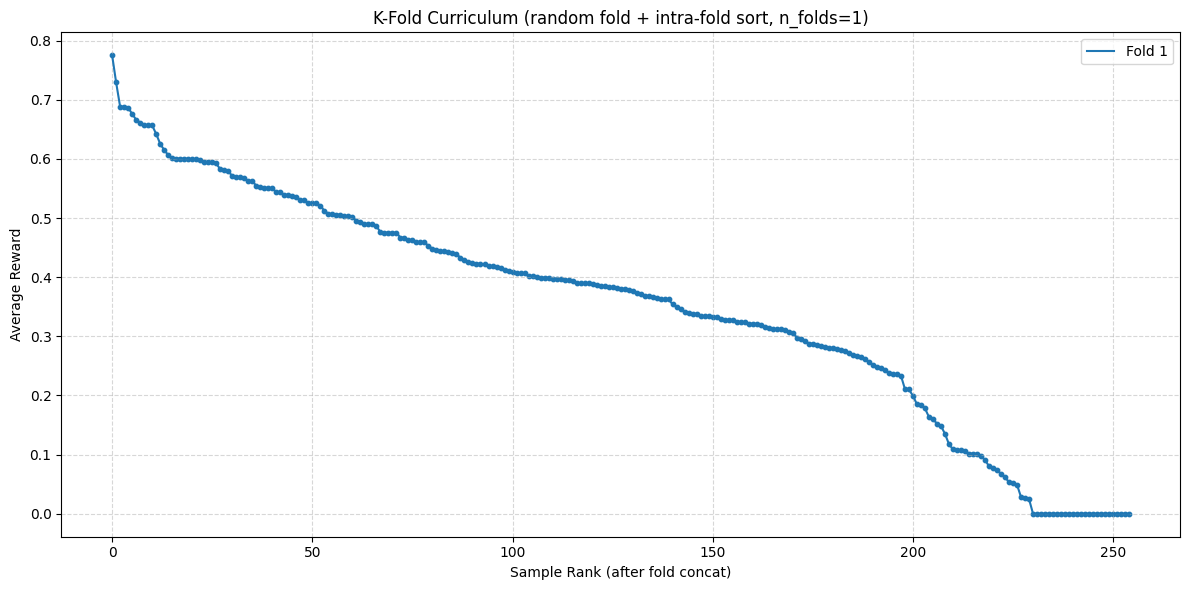

In [21]:
#!/usr/bin/env python3
import os
import json
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

# ======================================================
# 1. 数据加载
# ======================================================
def load_embeddings(path, device="cuda"):
    embs = torch.load(path, map_location=device)  # [N, D]
    if isinstance(embs, (list, tuple)):  # 保守判断
        embs = embs[0]
    return embs.to(device)

def load_scores(path):
    """从 jsonl 加载 difficulty 和 representativeness"""
    diff_dict, rep_dict = {}, {}
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            rec = json.loads(line)
            sid = int(rec["sample_id"])
            diff_dict[sid] = rec.get("difficulty", 0.0)
            rep_dict[sid] = rec.get("representativeness", 0.0)
    return diff_dict, rep_dict

# ======================================================
# 2. MaxMin 选择
# ======================================================
def maxmin_select(embs, scores_dict, select_k, init_id=None):
    device = embs.device
    N, D = embs.shape
    ids = torch.arange(N, device=device)

    # 归一化向量
    embs_norm = embs / (embs.norm(dim=1, keepdim=True) + 1e-12)

    # 初始点：如果没指定，就选 scores_dict 最大的
    if init_id is None:
        init_id = max(scores_dict.keys(), key=lambda x: scores_dict[x])
    selected_ids = [init_id]
    selected_vs = [1.0]

    # 初始化距离
    sim_init = (embs_norm @ embs_norm[init_id].unsqueeze(1)).squeeze(1)  # [N]
    dists = 1 - sim_init

    # 分数张量
    scores_arr = torch.tensor(
        [scores_dict.get(int(i.item()), 0.0) for i in ids],
        dtype=torch.float32,
        device=device,
    )

    for _ in tqdm(range(1, select_k), desc="maxmin selecting"):
        min_val, max_val = dists.min(), dists.max()
        v = (dists - min_val) / (max_val - min_val + 1e-12)

        final_scores = v * scores_arr
        final_scores[torch.tensor(selected_ids, device=device)] = -float("inf")

        new_id = int(torch.argmax(final_scores).item())
        selected_ids.append(new_id)
        selected_vs.append(float(v[new_id].item()))

        # 更新 dists
        sim_new = (embs_norm @ embs_norm[new_id].unsqueeze(1)).squeeze(1)
        dist_new = 1 - sim_new
        dists = torch.minimum(dists, dist_new)

    return selected_ids, selected_vs

# ======================================================
# 3. Fold 排序 & 可视化
# ======================================================
def random_fold_sort_with_visual(
    selected_ids,
    jsonl_path: str,
    output_path: str,
    n_folds: int = 5,
    plot_path: str = "reward_difficulty.png",
    seed: int = 42,
):
    selected_ids = set(selected_ids)

    # 读取 jsonl，计算平均 reward
    sample_rewards = {}
    with open(jsonl_path, "r") as f:
        for line in f:
            data = json.loads(line)
            sid = int(data["sample_id"])
            if sid in selected_ids:
                avg_reward = np.mean(data["reward"])
                sample_rewards[sid] = avg_reward
    print(f"匹配到 {len(sample_rewards)} 个样本")

    # 随机划分 fold
    all_ids = list(sample_rewards.keys())
    random.seed(seed)
    random.shuffle(all_ids)
    N = len(all_ids)
    if N < n_folds:
        raise ValueError(f"样本数 {N} 小于 fold 数 {n_folds}")
    fold_size = N // n_folds
    folds = []

    # 每个 fold 内部排序（reward 降序）
    for i in range(n_folds):
        start = i * fold_size
        end = (i + 1) * fold_size if i < n_folds - 1 else N
        fold_ids = all_ids[start:end]
        fold_rewards = [sample_rewards[sid] for sid in fold_ids]

        sorted_fold = sorted(zip(fold_ids, fold_rewards), key=lambda x: x[1], reverse=True)
        fold_ids_sorted = [sid for sid, _ in sorted_fold]
        fold_rewards_sorted = [r for _, r in sorted_fold]
        folds.append((fold_ids_sorted, fold_rewards_sorted))

    # 拼接所有 fold
    final_sorted_ids, final_rewards = [], []
    for (fold_ids_sorted, fold_rewards_sorted) in folds:
        final_sorted_ids.extend(fold_ids_sorted)
        final_rewards.extend(fold_rewards_sorted)

    # 保存 ids
    output_path = output_path.replace(".npy", f"_fold_{str(n_folds)}.npy")
    np.save(output_path, np.array(final_sorted_ids, dtype=int))
    print(f"排序结果已保存到 {output_path}")

    # 作图
    plt.figure(figsize=(12, 6))
    colors = plt.cm.tab10.colors
    offset, seq_rewards = 0, []
    for i, (_, fold_rewards_sorted) in enumerate(folds):
        x_range = range(offset, offset + len(fold_rewards_sorted))
        plt.plot(x_range, fold_rewards_sorted, color=colors[i % len(colors)], label=f"Fold {i+1}")
        plt.scatter(x_range, fold_rewards_sorted, s=10, color=colors[i % len(colors)])
        seq_rewards.extend(fold_rewards_sorted)
        offset += len(fold_rewards_sorted)

    plt.title(f"K-Fold Curriculum (random fold + intra-fold sort, n_folds={n_folds})")
    plt.xlabel("Sample Rank (after fold concat)")
    plt.ylabel("Average Reward")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.savefig(plot_path, dpi=300)
    print(f"可视化结果已保存到 {plot_path}")

    # 一致性检查
    assert np.allclose(seq_rewards, final_rewards, atol=1e-8)

    return final_sorted_ids, folds

# ======================================================
# 4. 主函数
# ======================================================
def main():
    # 参数
    select_k = 255
    alpha = 10
    n_folds = 1

    embs_file = "/storage_fast/lwang/SeqRecDistill/RRec/embs/selected/all_unique_embs.pt"
    scores_file = "/storage_fast/lwang/SeqRecDistill/RRec/scores/sample_scores.jsonl"
    train_jsonl = "/storage_fast/lwang/SeqRecDistill/RRec/train_diff/all_merged_sorted.jsonl"

    save_pt = f"/storage_fast/lwang/SeqRecDistill/RRec/scores/selected_indices_{select_k}.npy"
    save_jsonl = "/storage_fast/lwang/SeqRecDistill/RRec/scores/selected_samples.jsonl"
    sorted_output = f"/storage_fast/lwang/SeqRecDistill/RRec/scores/sorted_{str(select_k)}.npy"
    plot_path = "curriculum_seq_random.png"

    os.makedirs(os.path.dirname(save_pt), exist_ok=True)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")

    # 1. 加载数据
    embs = load_embeddings(embs_file, device=device)
    diff_dict, rep_dict = load_scores(scores_file)
    scores_dict = {k: alpha * diff_dict[k] + rep_dict[k] for k in diff_dict.keys()}

    # 2. MaxMin 选择
    selected_ids, selected_vs = maxmin_select(embs, scores_dict, select_k=select_k)

    # 保存挑选结果
    np.save(save_pt, selected_ids)
    print(f"✅ 已保存选择结果到 {save_pt}")

    with open(save_jsonl, "w", encoding="utf-8") as f:
        for sid, v in zip(selected_ids, selected_vs):
            rec = {
                "sample_id": sid,
                "v": v,
                "difficulty": diff_dict.get(sid, 0.0),
                "representativeness": rep_dict.get(sid, 0.0),
                "total": diff_dict.get(sid, 0.0) + rep_dict.get(sid, 0.0),
            }
            f.write(json.dumps(rec) + "\n")
    print(f"✅ 已保存详细结果到 {save_jsonl}")

    # 3. 排序 + 可视化
    sorted_ids, folds = random_fold_sort_with_visual(
        selected_ids,
        jsonl_path=train_jsonl,
        output_path=sorted_output,
        n_folds=n_folds,
        plot_path=plot_path,
        seed=42,
    )

    # 打印前几个样本
    print("\n示例选出的前 10 个样本:")
    for sid, v in zip(selected_ids[:10], selected_vs[:10]):
        d = diff_dict.get(sid, 0.0)
        r = rep_dict.get(sid, 0.0)
        print(f"id={sid}, v={v:.4f}, difficulty={d:.4f}, represent={r:.4f}, total={d+r:.4f}")

if __name__ == "__main__":
    main()

>>> Step1: Computing Difficulty and Representativeness scores...


/tmp/ipykernel_1484525/566695429.py:50: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _, grads, ids = torch.load(pt_path)
/tmp/ipykernel_1484525/566695429.py:67: FutureWarni

✅ Scores saved -> /storage_fast/lwang/SeqRecDistill/RRec/scores/sample_scores.jsonl
>>> Step2: MaxMin selection...


maxmin selecting: 100%|██████████| 1022/1022 [00:00<00:00, 3462.60it/s]


✅ Selected 1023 samples
>>> Step3: Curriculum sorting...
✅ Curriculum saved -> /storage_fast/lwang/SeqRecDistill/RRec/scores/sorted_1023.npy, /storage_fast/lwang/SeqRecDistill/RRec/scores/curriculum_seq.png

示例前10个:
id=5050, v=1.0000, diff=0.9996, rep=0.7756, total=1.7753
id=5607, v=0.7205, diff=1.0000, rep=0.5878, total=1.5878
id=4672, v=0.5474, diff=0.9988, rep=0.3838, total=1.3826
id=9125, v=0.5200, diff=0.9739, rep=0.6297, total=1.6036
id=5727, v=0.4620, diff=0.9386, rep=0.5435, total=1.4821
id=7056, v=0.4319, diff=0.9713, rep=0.3068, total=1.2781
id=3197, v=0.7390, diff=0.5148, rep=0.5644, total=1.0791
id=10648, v=0.4397, diff=0.9507, rep=0.6691, total=1.6198
id=6755, v=0.5055, diff=0.7347, rep=0.5145, total=1.2492
id=402, v=0.6074, diff=0.5648, rep=0.5545, total=1.1193


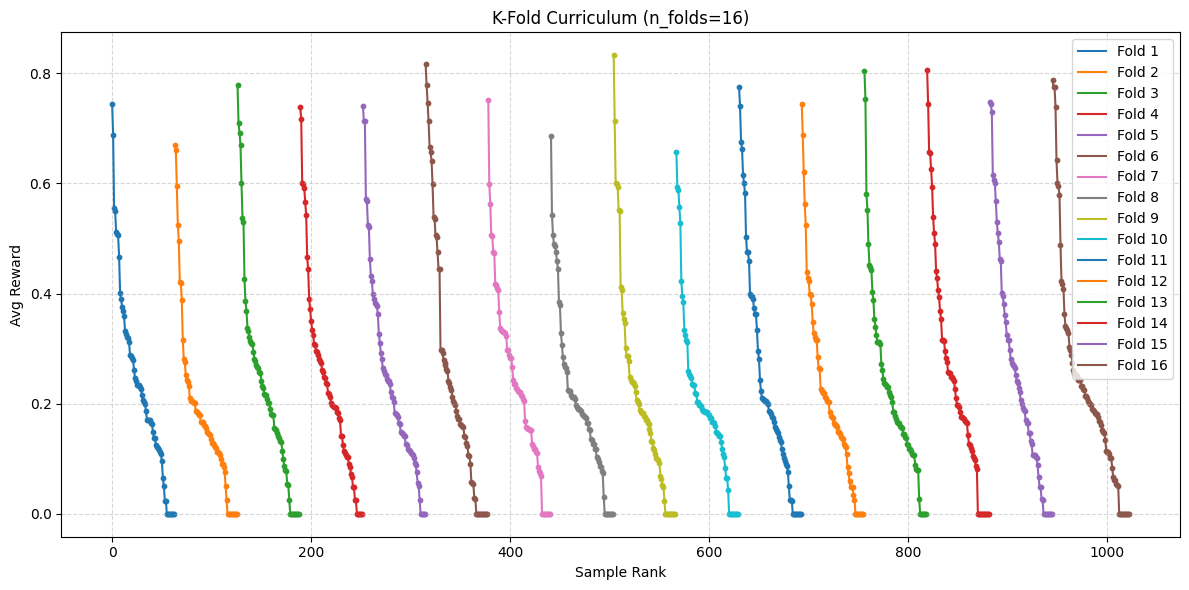

In [6]:
#!/usr/bin/env python3
import os
import json
import random
from collections import defaultdict

import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm




# ======================================================
# 1. Gaussian difficulty score
# ======================================================
def gaussian_scores(reward_pairs, mu=0.5, sigma=None):
    rewards = np.array([r for _, r in reward_pairs])
    mu = rewards.mean() if mu is None else mu
    sigma = rewards.std() if (sigma is None or sigma == 0) else sigma
    sigma = sigma if sigma > 0 else 1e-6

    scores_raw = np.exp(- (rewards - mu) ** 2 / (2 * sigma ** 2))
    min_val, max_val = scores_raw.min(), scores_raw.max()
    scores_norm = (scores_raw - min_val) / (max_val - min_val + 1e-12) if max_val > min_val else np.ones_like(scores_raw)
    return {sid: float(sc) for (sid, _), sc in zip(reward_pairs, scores_norm)}


def compute_difficulty_scores(jsonl_path):
    reward_dict = defaultdict(list)
    with open(jsonl_path, "r", encoding="utf-8") as f:
        for line in f:
            if not line.strip():
                continue
            rec = json.loads(line)
            sid = int(rec["sample_id"])
            rewards = rec.get("reward", [])
            if rewards:
                reward_dict[sid].append(sum(rewards) / len(rewards))

    merged = [(sid, sum(vals) / len(vals)) for sid, vals in reward_dict.items()]
    return gaussian_scores(merged, mu=0.5)


# ======================================================
# 2. Cosine representativeness score
# ======================================================
def compute_cosine_scores(pt_path):
    _, grads, ids = torch.load(pt_path)
    mean_vec = grads.mean(dim=0)
    mean_vec_norm = mean_vec / (mean_vec.norm() + 1e-12)

    grads_norm = grads / (grads.norm(dim=1, keepdim=True) + 1e-12)
    cos_sims = (grads_norm @ mean_vec_norm.unsqueeze(1)).squeeze()
    scores = (cos_sims + 1) / 2

    min_val, max_val = scores.min(), scores.max()
    scores_norm = (scores - min_val) / (max_val - min_val + 1e-12) if max_val > min_val else torch.ones_like(scores)
    return {int(i.item()): float(s) for i, s in zip(ids, scores_norm)}


# ======================================================
# 3. Embeddings + Save JSONL
# ======================================================
def load_embeddings(path, device="cuda"):
    embs = torch.load(path, map_location=device)
    if isinstance(embs, (list, tuple)):
        embs = embs[0]
    return embs.to(device)


def save_jsonl(path, records):
    with open(path, "w", encoding="utf-8") as f:
        for rec in records:
            f.write(json.dumps(rec) + "\n")


# ======================================================
# 4. MaxMin 选择
# ======================================================
def maxmin_select(embs, scores_dict, k, init_id=None):
    device = embs.device
    N = embs.shape[0]
    ids = torch.arange(N, device=device)
    embs_norm = embs / (embs.norm(dim=1, keepdim=True) + 1e-12)

    if init_id is None:
        init_id = max(scores_dict, key=scores_dict.get)
    selected, vs = [init_id], [1.0]

    dists = 1 - (embs_norm @ embs_norm[init_id].unsqueeze(1)).squeeze(1)
    scores_arr = torch.tensor([scores_dict.get(int(i), 0.0) for i in ids],
                              dtype=torch.float32, device=device)

    for _ in tqdm(range(1, k), desc="maxmin selecting"):
        v = (dists - dists.min()) / (dists.max() - dists.min() + 1e-12)
        final_scores = v * scores_arr
        final_scores[torch.tensor(selected, device=device)] = -1e9

        new_id = int(torch.argmax(final_scores))
        selected.append(new_id); vs.append(float(v[new_id]))
        dists = torch.minimum(dists, 1 - (embs_norm @ embs_norm[new_id].unsqueeze(1)).squeeze(1))

    return selected, vs


# ======================================================
# 5. Fold 排序 & 可视化
# ======================================================
def random_fold_sort_with_visual(selected_ids, reward_file, output_path, n_folds=5, plot_path="curriculum.png", seed=42):
    selected_ids = set(selected_ids)

    sample_rewards = {}
    with open(reward_file, "r") as f:
        for line in f:
            data = json.loads(line)
            sid = int(data["sample_id"])
            if sid in selected_ids:
                sample_rewards[sid] = np.mean(data["reward"])

    all_ids = list(sample_rewards.keys())
    random.seed(seed); random.shuffle(all_ids)
    N = len(all_ids)
    if N < n_folds:
        raise ValueError(f"样本数 {N} 小于 fold 数 {n_folds}")
    fold_size = N // n_folds

    folds, sorted_ids = [], []
    for i in range(n_folds):
        fold_ids = all_ids[i*fold_size : (i+1)*fold_size if i<n_folds-1 else N]
        sorted_fold = sorted(((sid, sample_rewards[sid]) for sid in fold_ids),
                             key=lambda x: x[1], reverse=True)
        fi, fr = zip(*sorted_fold)
        folds.append((fi, fr))
        sorted_ids.extend(fi)

    np.save(output_path.replace(".npy", f"_fold_{n_folds}.npy"), np.array(sorted_ids, dtype=int))

    plt.figure(figsize=(12, 6)); colors = plt.cm.tab10.colors; offset = 0
    for i, (_, rewards) in enumerate(folds):
        x_range = range(offset, offset + len(rewards))
        plt.plot(x_range, rewards, color=colors[i % len(colors)], label=f"Fold {i+1}")
        plt.scatter(x_range, rewards, s=10, color=colors[i % len(colors)])
        offset += len(rewards)
    plt.title(f"K-Fold Curriculum (n_folds={n_folds})")
    plt.xlabel("Sample Rank"); plt.ylabel("Avg Reward")
    plt.grid(True, linestyle="--", alpha=0.5); plt.legend(); plt.tight_layout()
    plt.savefig(plot_path, dpi=300)

    return sorted_ids, folds






# ======================================================
# 6. Main Pipeline
# ======================================================
def main(cfg):
    os.makedirs(cfg["output_dir"], exist_ok=True)

    # Step1: Scores
    print(">>> Step1: Computing Difficulty and Representativeness scores...")
    diff_scores = compute_difficulty_scores(cfg["reward_file"])
    rep_scores = compute_cosine_scores(cfg["grads_file"])
    scores_path = os.path.join(cfg["output_dir"], "sample_scores.jsonl")
    all_ids = sorted(set(diff_scores) | set(rep_scores))
    save_jsonl(scores_path, [
        {"sample_id": sid,
         "difficulty": diff_scores.get(sid),
         "representativeness": rep_scores.get(sid)} for sid in all_ids
    ])
    print(f"✅ Scores saved -> {scores_path}")

    # Step2: Selection
    print(">>> Step2: MaxMin selection...")
    embs = load_embeddings(cfg["embs_file"], cfg["device"])
    scores_dict = {sid: cfg["alpha"]*diff_scores.get(sid,0.0) + rep_scores.get(sid,0.0) for sid in all_ids}
    selected_ids, vs = maxmin_select(embs, scores_dict, cfg["select_k"])
    np.save(os.path.join(cfg["output_dir"], f"selected_indices_{cfg['select_k']}.npy"), selected_ids)
    save_jsonl(os.path.join(cfg["output_dir"], "selected_samples.jsonl"), [
        {"sample_id": sid,
         "v": v,
         "difficulty": diff_scores.get(sid,0.0),
         "representativeness": rep_scores.get(sid,0.0),
         "total": diff_scores.get(sid,0.0)+rep_scores.get(sid,0.0)} 
        for sid, v in zip(selected_ids, vs)
    ])
    print(f"✅ Selected {len(selected_ids)} samples")

    # Step3: Curriculum
    print(">>> Step3: Curriculum sorting...")
    sorted_output = os.path.join(cfg["output_dir"], f"sorted_{cfg['select_k']}.npy")
    plot_path = os.path.join(cfg["output_dir"], "curriculum_seq.png")
    random_fold_sort_with_visual(selected_ids, cfg["reward_file"], sorted_output, cfg["n_folds"], plot_path)
    print(f"✅ Curriculum saved -> {sorted_output}, {plot_path}")

    print("\n示例前10个:")
    for sid, v in zip(selected_ids[:10], vs[:10]):
        print(f"id={sid}, v={v:.4f}, diff={diff_scores.get(sid,0.0):.4f}, "
              f"rep={rep_scores.get(sid,0.0):.4f}, total={diff_scores.get(sid,0.0)+rep_scores.get(sid,0.0):.4f}")


# ======================================================
# 0. 全局配置（直接改这里即可）
# ======================================================
CONFIG = {
    "reward_file": "/storage_fast/lwang/SeqRecDistill/RRec/train_diff/all_merged_sorted.jsonl",
    "grads_file": "/storage_fast/lwang/SeqRecDistill/RRec/grads/grads_all_sorted_dedup.pt",
    "embs_file": "/storage_fast/lwang/SeqRecDistill/RRec/embs/selected/all_unique_embs.pt",
    "output_dir": "/storage_fast/lwang/SeqRecDistill/RRec/scores",

    "select_k": 1023,
    "alpha": 200,
    "n_folds": 16,
    "device": "cuda" if torch.cuda.is_available() else "cpu",
}



if __name__ == "__main__":
    main(CONFIG)